Ouvrir le fichier et afficher l’image;

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
filename = "wooden_cars_noisy.png"
img = mpimg.imread(filename)

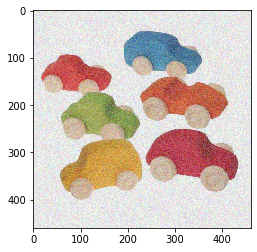

In [4]:
# show image
plt.imshow(img)

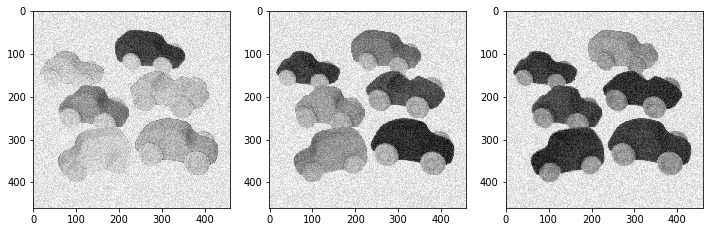

In [5]:
# show RGB components
plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(img[:,:,i], cmap='gray', vmin=0, vmax=1)

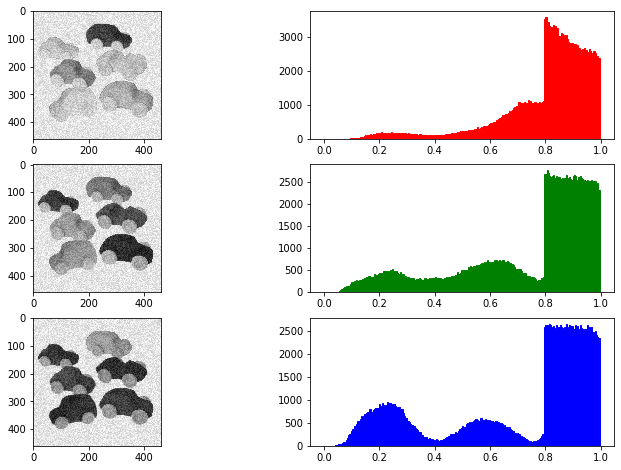

In [6]:
# histograms for each color component
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12,8))
for i in range(3):
    plt.subplot(3,2,2*i+1)
    plt.imshow(img[:,:,i], cmap='gray', vmin=0, vmax=1)
    plt.subplot(3,2,2*i+2)
    plt.hist( img[:,:,i].ravel(), 256, range=(0,1), fc=colors[i], ec=colors[i]);

In [7]:
# opencv library
import cv2

D’isoler et afficher la voiture verte

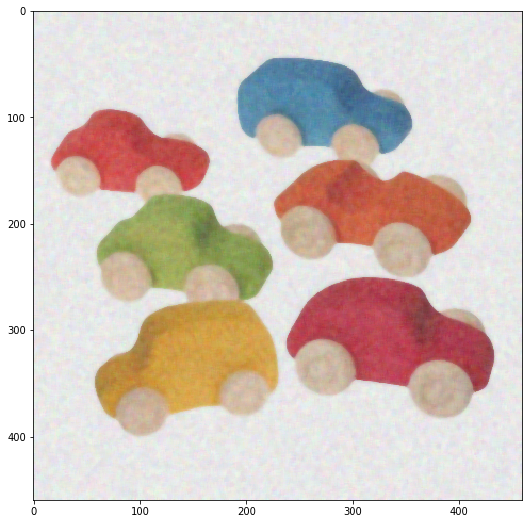

In [20]:
# median filter
filtered_img = cv2.medianBlur(img,5) # only 3x3 or 5x5 kernel size if dtype=float

plt.figure(figsize=(16,9))
plt.imshow(filtered_img, vmin=0, vmax=1)

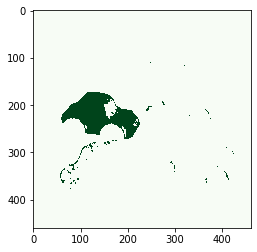

In [42]:
greens = np.where( np.logical_and( (filtered_img[:,:,0] < 0.7),
                          np.logical_and( (filtered_img[:,:,1] > 0.5), (filtered_img[:,:,2] < 0.5)) ), 1.0, 0.0)
                
plt.imshow(greens, cmap='Greens', vmin=0, vmax=1)

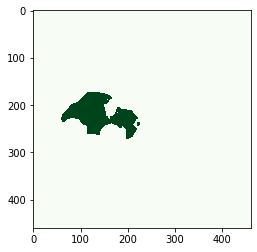

In [46]:
eroded_greens = cv2.erode( greens, np.ones((5,5)) )
opened_greens = cv2.dilate( eroded_greens, np.ones((5,5)) )

plt.imshow(opened_greens, cmap="Greens", vmin=0, vmax=1)

60.54875698254966 175.5499243430514 160.90248603490068 86.9001513138972


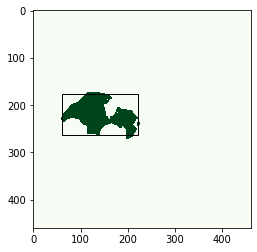

In [47]:
greens_coords = np.argwhere(opened_greens==1.0)
greens_y, greens_x = np.mean(greens_coords, 0, dtype=(int,int))
greens_y_s, greens_x_s = np.std(greens_coords, 0)*4

greens_x = greens_x - greens_x_s/2
greens_y = greens_y - greens_y_s/2

print(greens_x, greens_y, greens_x_s, greens_y_s)

fig, ax = plt.subplots()
plt.imshow(opened_greens, cmap="Greens", vmin=0, vmax=1)
greens_bb = plt.Rectangle( (greens_x, greens_y), greens_x_s, greens_y_s, color='k', fill=False)
ax.add_artist(greens_bb)

60.54875698254966 175.5499243430514 160.90248603490068 86.9001513138972


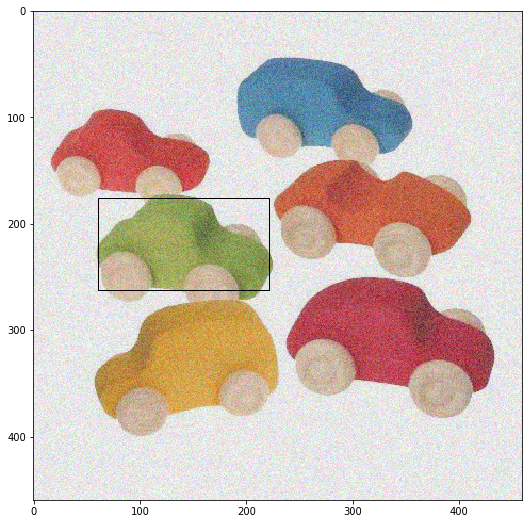

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
plt.imshow(img, vmin=0, vmax=1)
greens_coords = np.argwhere(opened_greens==1.0)
greens_y, greens_x = np.mean(greens_coords, 0, dtype=(int,int))
greens_y_s, greens_x_s = np.std(greens_coords, 0)*4

greens_x = greens_x - greens_x_s/2
greens_y = greens_y - greens_y_s/2

print(greens_x, greens_y, greens_x_s, greens_y_s)    
greens_bb = plt.Rectangle( (greens_x, greens_y), greens_x_s, greens_y_s, color='k', fill=False)
ax.add_artist(greens_bb)    
